In [112]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [114]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [115]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3862,spam,Oh my god! I've found your number again! I'm s...,NaN,NaN,NaN
4624,ham,I'm on the bus. Love you,NaN,NaN,NaN
5612,spam,Unlock the hidden features of your smartphone.,NaN,NaN,NaN
1313,ham,How abt making some of the pics bigger?,NaN,NaN,NaN
3985,ham,"Friendship is not a game to play, It is not a ...",NaN,NaN,NaN


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5773 entries, 0 to 5772
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5773 non-null   object
 1   v2          5773 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 225.6+ KB


In [117]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5773,5773,50,12,6
unique,2,5250,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4875,30,3,2,2


In [118]:
data = df.copy()

In [119]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [120]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis =1, inplace=True)

In [121]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [122]:
data.rename(columns={'v1' : 'label','v2': 'mails'}, inplace=True)

In [123]:
data['mails'].duplicated().sum()

523

In [124]:
data.drop_duplicates(inplace=True)

In [125]:
data.duplicated().sum()

0

In [126]:
data.head()

,label,mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [127]:
from sklearn.preprocessing import LabelEncoder

In [128]:
encoder = LabelEncoder()
data['label']=encoder.fit_transform(data['label'])

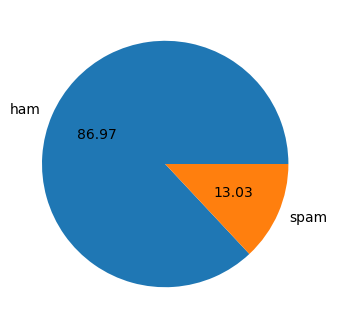

In [129]:
plt.figure(figsize=(4,4))
plt.pie(data.label.value_counts(),labels= ['ham', 'spam'], autopct='%0.2f')
plt.show()

In [130]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [131]:
def text_decoder(mail):
    text = []
    words = nltk.word_tokenize(mail.lower())
    for i in words:
        if i.isalnum():
            if i not in stopwords.words('english') and i not in string.punctuation:
                text.append(ps.stem(i))
    return " ".join(text)                
    

In [132]:
data['processed_mails'] = data['mails'].apply(text_decoder)

In [133]:
data.head()

,label,mails,processed_mails
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [134]:
spam_words = []
for msgs in data[data['label'] == 1]['processed_mails'].tolist():
    for word in msgs.split():
        spam_words.append(word)

In [135]:
len(spam_words)

10077

In [136]:
from collections import Counter

In [137]:
xspam = pd.DataFrame(Counter(spam_words).most_common(40))[0]
yspam = pd.DataFrame(Counter(spam_words).most_common(40))[1]

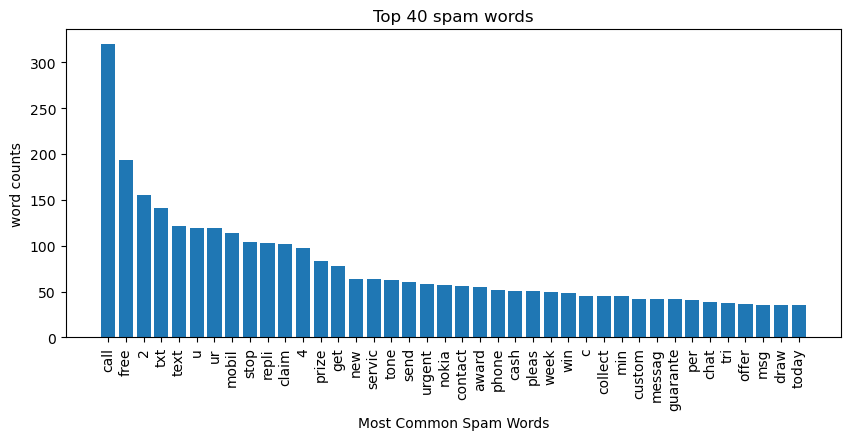

In [138]:
plt.figure(figsize=(10,4))
plt.bar(xspam, yspam)
plt.ylabel('word counts')
plt.xlabel('Most Common Spam Words')
plt.xticks(rotation='vertical')
plt.title('Top 40 spam words')
plt.show()

In [139]:
ham_words = []
for msgs in data[data['label'] == 0]['processed_mails']:
    for word in msgs.split():
        ham_words.append(word)

In [140]:
xham = pd.DataFrame(Counter(ham_words).most_common(40))[0]
yham = pd.DataFrame(Counter(ham_words).most_common(40))[1]

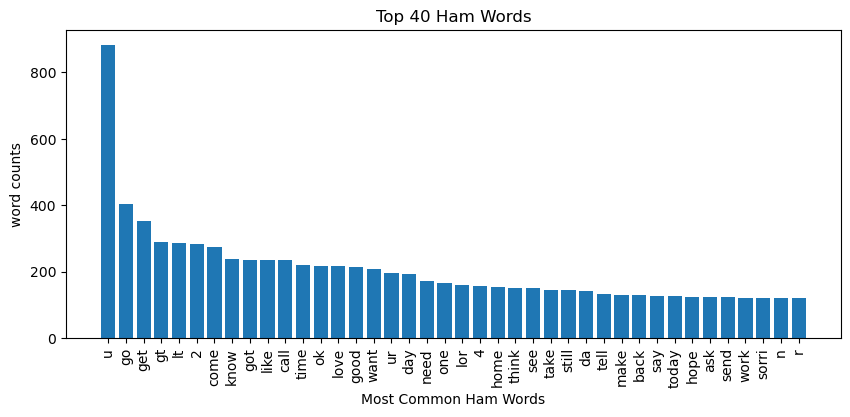

In [141]:
plt.figure(figsize=(10,4))
plt.bar(xham, yham)
plt.xticks(rotation = 'vertical')
plt.xlabel('Most Common Ham Words')
plt.ylabel('word counts')
plt.title('Top 40 Ham Words')
plt.show()

In [142]:
# !pip install wordcloud

In [143]:
from wordcloud import WordCloud

In [144]:
wc = WordCloud(height=800, width=800, background_color='white').generate(" ".join(spam_words))

Text(0.5, 1.0, 'SPAM CLOUD')

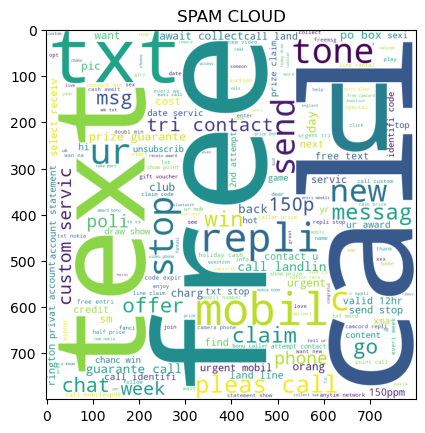

In [145]:
plt.imshow(wc)
plt.title("SPAM CLOUD")

Text(0.5, 1.0, 'HAM CLOUD')

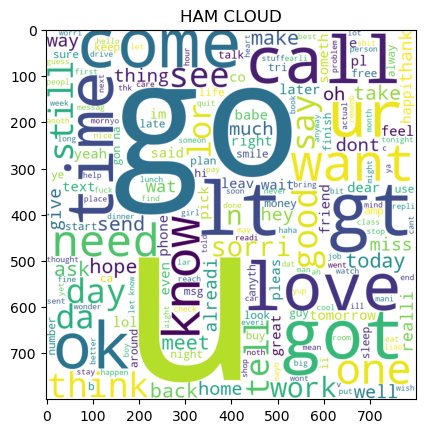

In [146]:
wc = WordCloud(height=800, width=800, background_color='white').generate(" ".join(ham_words))
plt.imshow(wc)
plt.title("HAM CLOUD")

In [147]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [148]:
# vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_mails']).toarray()

In [149]:
y = data['label'].values

In [150]:
X_train, X_test, y_train, y_yest = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lgr = LogisticRegression()
rfc = RandomForestClassifier()

In [152]:
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)
lgr.fit(X_train, y_train)
rfc.fit(X_train, y_train)
# gnb.fit(X_train, y_train)

RandomForestClassifier()

In [153]:
from sklearn.metrics import accuracy_score, precision_score

In [154]:
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test)
y_pred_lgr = lgr.predict(X_test)
y_pred_rfc = rfc.predict(X_test)



print("GNB Precision:", precision_score(y_yest, y_pred_gnb), "GNB Accuracy:", accuracy_score(y_yest, y_pred_gnb))
print("MNB Precision:", precision_score(y_yest, y_pred_mnb), "MNB Accuracy:", accuracy_score(y_yest, y_pred_mnb))
print("BNB Precision:", precision_score(y_yest, y_pred_bnb), "BNB Accuracy:", accuracy_score(y_yest, y_pred_bnb))
print("LGR Precision:", precision_score(y_yest, y_pred_lgr), "LGR Accuracy:", accuracy_score(y_yest, y_pred_lgr))
print("RFC Precision:", precision_score(y_yest, y_pred_rfc), "RFC Accuracy:", accuracy_score(y_yest, y_pred_rfc))

GNB Precision: 0.510548523206751 GNB Accuracy: 0.8723809523809524
MNB Precision: 1.0 MNB Accuracy: 0.959047619047619
BNB Precision: 0.9482758620689655 BNB Accuracy: 0.9666666666666667
LGR Precision: 0.9662921348314607 LGR Accuracy: 0.9466666666666667
RFC Precision: 0.9814814814814815 RFC Accuracy: 0.9666666666666667


In [155]:
import joblib

In [156]:
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(mnb , 'model.pkl')

['model.pkl']

In [157]:
print(mnb.predict((vectorizer.transform([text_decoder('You won 500k lottery. Register and claim now.')])))[0])

1
